# Keras Syntax Basics

## The Data

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

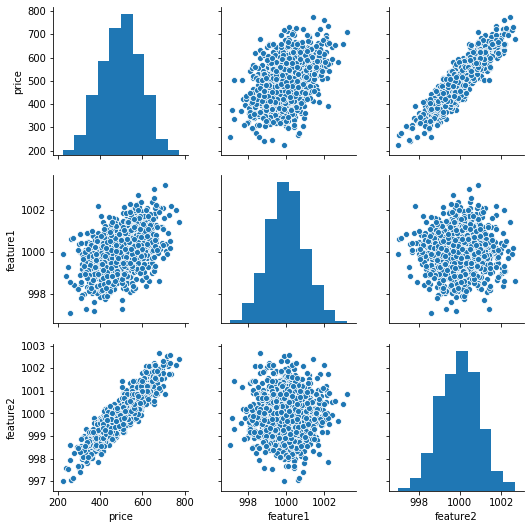

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [25]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
700/700 [==============================] - 0s 599us/sample - loss: 256720.8927
Epoch 2/250
700/700 [==============================] - 0s 41us/sample - loss: 256689.4386
Epoch 3/250
700/700 [==============================] - 0s 44us/sample - loss: 256667.4128
Epoch 4/250
700/700 [==============================] - 0s 49us/sample - loss: 256645.5014
Epoch 5/250
700/700 [==============================] - 0s 43us/sample - loss: 256623.5672
Epoch 6/250
700/700 [==============================] - 0s 41us/sample - loss: 256601.6939
Epoch 7/250
700/700 [==============================] - 0s 50us/sample - loss: 256579.8107
Epoch 8/250
700/700 [==============================] - 0s 49us/sample - loss: 256557.8998
Epoch 9/250
700/700 [==============================] - 0s 41us/sample - loss: 256535.9705
Epoch 10/250
700/700 [==============================] - 0s 43us/sample - loss: 256514.0922
Epoch 11/250
700/700 [==============================] - 0s 42us/sample - loss: 256492.2396
Epoch 1

700/700 [==============================] - 0s 38us/sample - loss: 254744.5052
Epoch 92/250
700/700 [==============================] - 0s 40us/sample - loss: 254722.6624
Epoch 93/250
700/700 [==============================] - 0s 37us/sample - loss: 254700.8727
Epoch 94/250
700/700 [==============================] - 0s 34us/sample - loss: 254679.1110
Epoch 95/250
700/700 [==============================] - 0s 37us/sample - loss: 254657.2604
Epoch 96/250
700/700 [==============================] - 0s 39us/sample - loss: 254635.4589
Epoch 97/250
700/700 [==============================] - 0s 35us/sample - loss: 254613.6259
Epoch 98/250
700/700 [==============================] - 0s 36us/sample - loss: 254591.8635
Epoch 99/250
700/700 [==============================] - 0s 37us/sample - loss: 254570.0191
Epoch 100/250
700/700 [==============================] - 0s 36us/sample - loss: 254548.2134
Epoch 101/250
700/700 [==============================] - 0s 37us/sample - loss: 254526.4343
Epoch 102/

700/700 [==============================] - 0s 35us/sample - loss: 252807.3948
Epoch 181/250
700/700 [==============================] - 0s 40us/sample - loss: 252785.6961
Epoch 182/250
700/700 [==============================] - 0s 37us/sample - loss: 252763.9442
Epoch 183/250
700/700 [==============================] - 0s 37us/sample - loss: 252742.2274
Epoch 184/250
700/700 [==============================] - 0s 46us/sample - loss: 252720.4755
Epoch 185/250
700/700 [==============================] - 0s 43us/sample - loss: 252698.7679
Epoch 186/250
700/700 [==============================] - 0s 39us/sample - loss: 252677.0827
Epoch 187/250
700/700 [==============================] - 0s 41us/sample - loss: 252655.3919
Epoch 188/250
700/700 [==============================] - 0s 38us/sample - loss: 252633.5641
Epoch 189/250
700/700 [==============================] - 0s 37us/sample - loss: 252611.8455
Epoch 190/250
700/700 [==============================] - 0s 36us/sample - loss: 252590.2055
Ep

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [26]:
model.history.history

{'loss': [256720.89267857143,
  256689.43857142856,
  256667.41276785714,
  256645.50142857144,
  256623.56723214284,
  256601.69392857142,
  256579.8107142857,
  256557.89982142858,
  256535.9705357143,
  256514.09223214287,
  256492.23955357142,
  256470.34973214284,
  256448.45,
  256426.57357142857,
  256404.70794642856,
  256382.8600892857,
  256360.96875,
  256339.00946428571,
  256317.1276785714,
  256295.21875,
  256273.40464285715,
  256251.57410714286,
  256229.70446428572,
  256207.84294642857,
  256185.9461607143,
  256164.0930357143,
  256142.23401785715,
  256120.3407142857,
  256098.48392857143,
  256076.56669642858,
  256054.7050892857,
  256032.8807142857,
  256011.0280357143,
  255989.14651785715,
  255967.25714285715,
  255945.4499107143,
  255923.563125,
  255901.72919642858,
  255879.81491071428,
  255857.93758928572,
  255836.04910714287,
  255814.1905357143,
  255792.338125,
  255770.51053571427,
  255748.70107142857,
  255726.809375,
  255704.97982142857,
  2556

In [27]:
loss = model.history.history['loss']

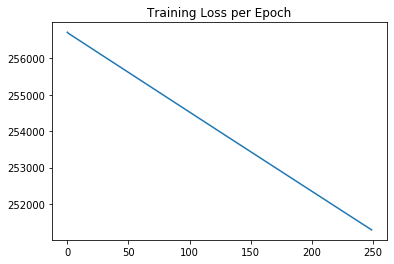

In [28]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [29]:
model.metrics_names

['loss']

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

251277.7455357143

In [32]:
test_score

253687.845625

### Further Evaluations

In [33]:
test_predictions = model.predict(X_test)

In [34]:
test_predictions

array([[5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.505844],
       [5.50

In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
5,584.381108
6,514.405641
7,464.115870
8,551.650100
9,451.804172


In [37]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [38]:
test_predictions

0      5.505844
1      5.505844
2      5.505844
3      5.505844
4      5.505844
5      5.505844
6      5.505844
7      5.505844
8      5.505844
9      5.505844
10     5.505844
11     5.505844
12     5.505844
13     5.505844
14     5.505844
15     5.505844
16     5.505844
17     5.505844
18     5.505844
19     5.505844
20     5.505844
21     5.505844
22     5.505844
23     5.505844
24     5.505844
25     5.505844
26     5.505844
27     5.505844
28     5.505844
29     5.505844
         ...   
270    5.505844
271    5.505844
272    5.505844
273    5.505844
274    5.505844
275    5.505844
276    5.505844
277    5.505844
278    5.505844
279    5.505844
280    5.505844
281    5.505844
282    5.505844
283    5.505844
284    5.505844
285    5.505844
286    5.505844
287    5.505844
288    5.505844
289    5.505844
290    5.505844
291    5.505844
292    5.505844
293    5.505844
294    5.505844
295    5.505844
296    5.505844
297    5.505844
298    5.505844
299    5.505844
Length: 300, dtype: floa

In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df.columns = ['Test Y','Model Predictions']

In [41]:
pred_df

,Test Y,Model Predictions
0,402.296319,5.505844
1,624.156198,5.505844
2,582.455066,5.505844
3,578.588606,5.505844
4,371.224104,5.505844
5,584.381108,5.505844
6,514.405641,5.505844
7,464.115870,5.505844
8,551.650100,5.505844
9,451.804172,5.505844


Let's compare to the real test labels!

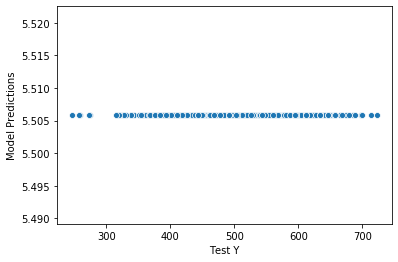

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

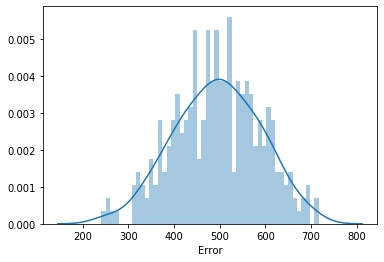

In [44]:
sns.distplot(pred_df['Error'],bins=50)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

494.86949535887214

In [47]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

253687.84910215755

In [48]:
# Essentially the same thing, difference just due to precision
test_score

253687.845625

In [49]:
#RMSE
test_score**0.5

503.67434481517915

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [50]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [51]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem)

array([[5.505844]], dtype=float32)

## Saving and Loading a Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
later_model = load_model('my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [57]:
later_model.predict(new_gem)

array([[5.505844]], dtype=float32)